<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###CS6501_Lab_2.1

## Imports

In [1]:
# import libraries
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

## Synthetic Dataset

Generate isotropic Gaussian blobs using "[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)"


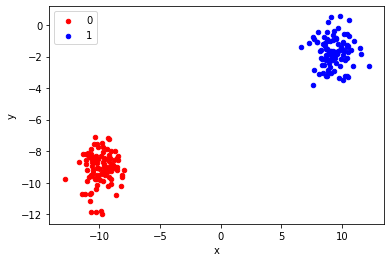

In [17]:
## randomly generate a 2d, 2 classes dataset
# run several times the cell to observe the results

X1, y1 = make_blobs(n_samples=200, centers=2, n_features=2)
# create a data frame
df = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
# two classes
colors = {0:'red', 1:'blue'}
# figure
fig, ax = plt.subplots()
grouped = df.groupby('label')
# scatter plot
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# show the plot
plt.show()

In [18]:
# show first n rows (default 5)
df.head()

x         y  label
0 -10.676456 -8.449722      0
1  -9.269561 -7.165704      0
2 -11.089615 -8.833555      0
3  10.382162 -0.532424      1
4   7.918080 -1.084827      1

In [19]:
# count the data elements for each class
df['label'].value_counts()

1    100
0    100
Name: label, dtype: int64

## Logistic Regresion

* [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 
* In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). 




In [20]:
# Logistic Regression model
LR_model = LogisticRegression()
# fit to data a Logistic Regresion model
LR_model.fit(X1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Decision boundary from [Wikipedia](https://en.wikipedia.org/wiki/Decision_boundary): 

* A decision boundary is the region of a problem space in 
which the output label of a classifier is ambiguous.

* If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable.

* In a statistical-classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class.

* You can find a related information to this topic in this [publication](https://towardsdatascience.com/classification-problems-and-exploring-decision-boundaries-3317e03afcdb)




/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


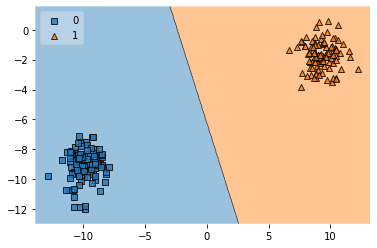

In [21]:
# Plotting the decision boundary 
# from the LogisticRegression model
plot_decision_regions(X1, y1, clf=LR_model, legend=2)


## New Data

In [26]:
# new data instances (10)
X_new, _ = make_blobs(n_samples=10, centers=2, n_features=2)

## Predictions

In [27]:
# make predictions (assign class labels)
y_pred = LR_model.predict(X_new)
# show the inputs and predicted outputs
for i in range(len(X_new)):
	#print("X=%s, Class Predicted = %s" % (X_new[i], y_pred[i]))
  print("X{0} = {1}, Class Predicted = {2}".format(i, X_new[i], y_pred[i]))

X0 = [ 9.79372389 -2.80598531], Class Predicted = 1
X1 = [-8.74805358  8.07851257], Class Predicted = 0
X2 = [-7.67238675  8.28294564], Class Predicted = 0
X3 = [10.46057974 -2.66394867], Class Predicted = 1
X4 = [-7.89145312  8.75593614], Class Predicted = 0
X5 = [-7.78640811  9.57803324], Class Predicted = 0
X6 = [10.08722501 -4.63567181], Class Predicted = 1
X7 = [ 9.28782036 -5.77906696], Class Predicted = 1
X8 = [10.84182606 -4.65669974], Class Predicted = 1
X9 = [-7.19723786  9.90378084], Class Predicted = 0


In [28]:
# create a data frame
df_new = DataFrame(dict(x=X_new[:,0], y=X_new[:,1], label=y_pred))

In [29]:
# show 10 rows 
df_new.head(10)

x         y  label
0   9.793724 -2.805985      1
1  -8.748054  8.078513      0
2  -7.672387  8.282946      0
3  10.460580 -2.663949      1
4  -7.891453  8.755936      0
5  -7.786408  9.578033      0
6  10.087225 -4.635672      1
7   9.287820 -5.779067      1
8  10.841826 -4.656700      1
9  -7.197238  9.903781      0

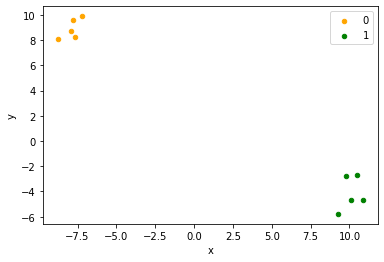

In [30]:
# two classes
colors2 = {0:'orange', 1:'green'}
# figure
fig2, ax2 = plt.subplots()
# new data
grouped2 = df_new.groupby('label')
# scatter plot
for key2, group2 in grouped2:
    group2.plot(ax=ax2, kind='scatter', x='x', y='y', label=key2, color=colors2[key2])
# show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


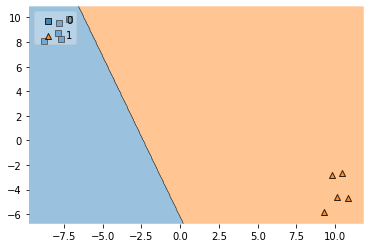

In [31]:
# Plotting the new decision boundary 
# from the LogisticRegression model
plot_decision_regions(X_new, y_pred, clf=LR_model, legend=2)